# Segmentation d'espèces avec analyse de clusters

#### Introduction
Le jeu de données des Iris est un grand classique du machine learning. Il est souvent utilisé pour illustrer des concepts de base de la classification et du clustering. Une page Wikipedia y est dédiée : https://en.wikipedia.org/wiki/Iris_flower_data_set

Le jeu de données se compose de 4 features numériques qui mesurent les dimensions des sépales et des pétales des fleurs d'iris.

---

#### Objectif
Cet exercice vise à explorer le jeu de données de deux manières distinctes :

1.  **Clustering** : Effectuer une analyse de regroupement non supervisée (K-Means) pour segmenter les fleurs et comparer la segmentation obtenue avec la véritable classification des espèces.

2.  **Classification** : Construire un modèle de classification supervisée (régression logistique) pour prédire l'espèce de chaque fleur.  

---

#### Contenu de ce notebook
Ce notebook traite en détail le deuxième point de l'exercice : la classification supervisée.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Données sans les espèces
data = pd.read_csv('../data/iris_with_species.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Regression Logistique

In [5]:
from sklearn.linear_model import LogisticRegression

In [20]:
#Division des données entre features X et label Y
X = data.drop('species', axis=1)
Y = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

## Mise à l'échelle

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [21]:
#Fractionnement en données d'entraînement et données de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=101)

In [12]:
reg_log = LogisticRegression()

reg_log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
#Prédictions
y_pred = reg_log.predict(X_test)

## Évaluation de la classification :
### Rapport de classification et Matrice de Confusion

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



<Figure size 960x720 with 0 Axes>

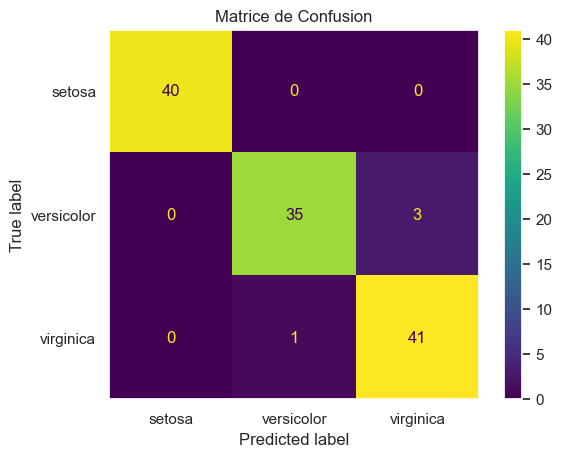

In [25]:
class_names = ['setosa', 'versicolor', 'virginica']
plt.figure(dpi=150)
ConfusionMatrixDisplay.from_estimator(reg_log, X_train, y_train, display_labels=class_names)
plt.grid(False)
plt.title('Matrice de Confusion')
plt.show()